# predictorの次時刻予測の精度を確認する

In [1]:
import argparse
import os
path = os.getcwd()
path=path[:path.find('estimate-innovation')+20]
# No = (os.path.basename(__file__))[-4]
No = "0" # notebook用
# print('実験No.'+No)
import warnings
warnings.simplefilter('ignore')# 警告を非表示
import numpy as np
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)
import matplotlib.pyplot as plt
from scipy import stats
import math
import sys
sys.path.append(path)
import random
import time
import statsmodels.api as sm
from scipy.stats import norm
import japanize_matplotlib
from scipy.stats import gaussian_kde

import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
# 人工データを生成してくれる機械が置いてあるところ
import tsModel
# 学習用のニューラルネットが置いてあるところ
import models
# p-Wasserstein距離の関数
import Wasserstein
path

'/home/lab/ryuichi/Documents/research/estimate-innovation/'

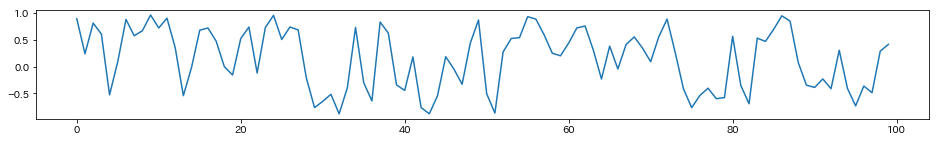

In [30]:
phi_a = [1.0, -0.5, 0.7, -0.4] ; phi_b = [0]
p = len(phi_a) ; q = len(phi_b)
dataSeed=2**32-1
N = 100
data = tsModel.nonLinearARIMA(a=phi_a, b=phi_b, N=N, random_seed=dataSeed, randomness='uniform', sigma=1/np.sqrt(3))
inno = tsModel.nonLinearARIMA(a=phi_a, b=phi_b, N=N, random_seed=dataSeed, randomness='uniform', return_innovation=True, sigma=1/np.sqrt(3))
# 描画
plt.figure(figsize=(16,2)) ; plt.plot(data) ; plt.show()

In [72]:
hat_p=4

In [73]:
predictor = models.semiLinearPredictNet(input_size=hat_p+1)
preF_paramPath = path+"kurtosis_loss/parameters/p{0}/pre_semiLinearPredictor.pth".format(hat_p)
predictor.load_state_dict(torch.load(preF_paramPath))
predictor.state_dict()

OrderedDict([('scale', tensor([1.2862])),
             ('fc1.weight',
              tensor([[-0.0009, -0.2030,  0.3660, -0.2481,  0.6023]]))])

In [74]:
predict = np.array([predictor(torch.cat([torch.zeros(1,1), torch.from_numpy(data[i-hat_p:i]).view(1,-1).float()], dim=1)).item() for i in range(hat_p,N)])

Text(0.5, 1.0, 'mse=0.09101308796453661')

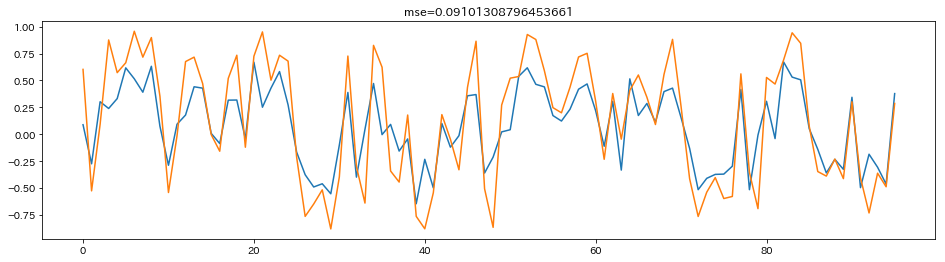

In [75]:
plt.figure(figsize=(16,4))
plt.plot(predict)
plt.plot(data[hat_p-1:-1])
plt.title("mse={0}".format(((predict-data[hat_p-1:-1])**2).mean()))

In [76]:
predictor = models.semiLinearPredictNet(input_size=hat_p+1)
preF_paramPath = path+"kurtosis_loss/parameters/p{0}/semiLinearPredictor.pth".format(hat_p)
predictor.load_state_dict(torch.load(preF_paramPath, map_location="cpu"))
predictor.state_dict()

OrderedDict([('scale', tensor([1.2905])),
             ('fc1.weight',
              tensor([[ 0.9940, -0.2253,  0.3747, -0.2505,  0.6035]]))])

In [77]:
predict = np.array([predictor(torch.cat([torch.zeros(1,1), torch.from_numpy(data[i-hat_p:i]).view(1,-1).float()], dim=1)).item() for i in range(hat_p,N)])

Text(0.5, 1.0, 'mse=0.09416386986621156')

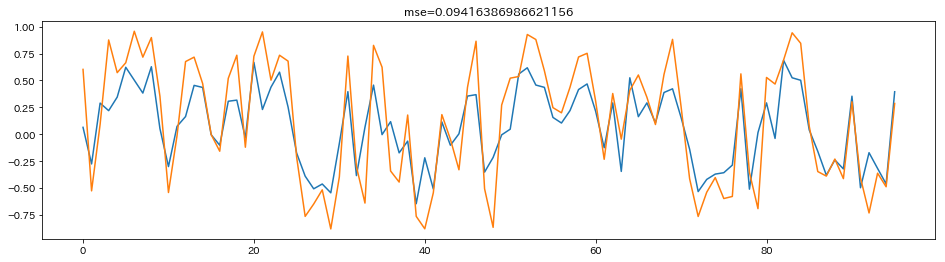

In [78]:
plt.figure(figsize=(16,4))
plt.plot(predict)
plt.plot(data[hat_p-1:-1])
plt.title("mse={0}".format(((predict-data[hat_p-1:-1])**2).mean()))

In [79]:
predictor = models.semiLinearPredictNet(input_size=hat_p+1)
preF_paramPath = path+"kurtosis_loss/parameters/p{0}/semiLinearPredictor_gauss.pth".format(hat_p)
predictor.load_state_dict(torch.load(preF_paramPath, map_location="cpu"))
predictor.state_dict()

OrderedDict([('scale', tensor([1.3571])),
             ('fc1.weight',
              tensor([[ 0.9996, -0.2197,  0.3811, -0.2388,  0.6672]]))])

In [80]:
predict = np.array([predictor(torch.cat([torch.zeros(1,1), torch.from_numpy(data[i-hat_p:i]).view(1,-1).float()], dim=1)).item() for i in range(hat_p,N)])

Text(0.5, 1.0, 'mse=0.0690853651590284')

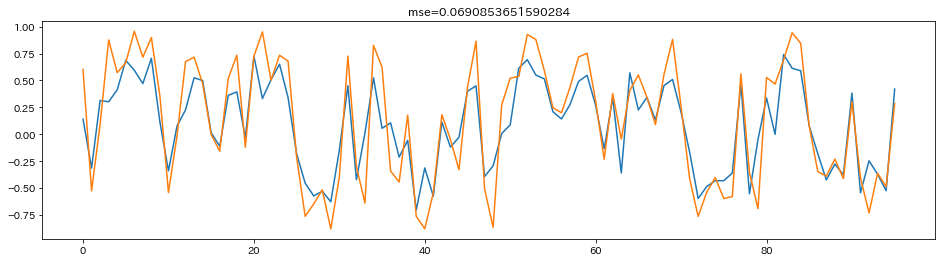

In [81]:
plt.figure(figsize=(16,4))
plt.plot(predict)
plt.plot(data[hat_p-1:-1])
plt.title("mse={0}".format(((predict-data[hat_p-1:-1])**2).mean()))